In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8*n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row*n_col):
    plt.subplot(n_row, n_col, i+ 1)
    plt.imshow(images[i].reshape((h, w)), стар=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [ ]:
import os
import cv2
import numpy as np

# Directory containing the images
dir_name = "/content/drive/My Drive/Projects/face_reg/dataset/dataset/faces"

# Initialize lists and variables
X = []
y = []
target_names = []
class_names = []

person_id = 0
h = w = 300
n_samples = 0

# Loop through each person in the directory
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)

    for image_name in os.listdir(dir_path):
        # Formulate the image path
        image_path = os.path.join(dir_path, image_name)

        # Read the input image
        img = cv2.imread(image_path)

        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize image to 300x300 dimensions
        resized_image = cv2.resize(gray, (h, w))

        # Convert matrix to vector
        v = resized_image.flatten()

        # Append the vector to X
        X.append(v)

        # Increase the number of samples
        n_samples += 1

        # Add the categorical label
        y.append(person_id)

        # Add the person name
        target_names.append(person_name)

    # Increase the person id by 1
    person_id += 1

# Transform lists to numpy arrays
X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)

# Determine the number of features
n_features = X.shape[1]
n_classes = target_names.shape[0]

# Print the shapes and sizes
print("y shape:", y.shape)
print("X shape:", X.shape)
print("target_names shape:", target_names.shape)
print("Number of samples:", n_samples)
print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")


y shape: (450,)
X shape: (450, 90000)
target_names shape: (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


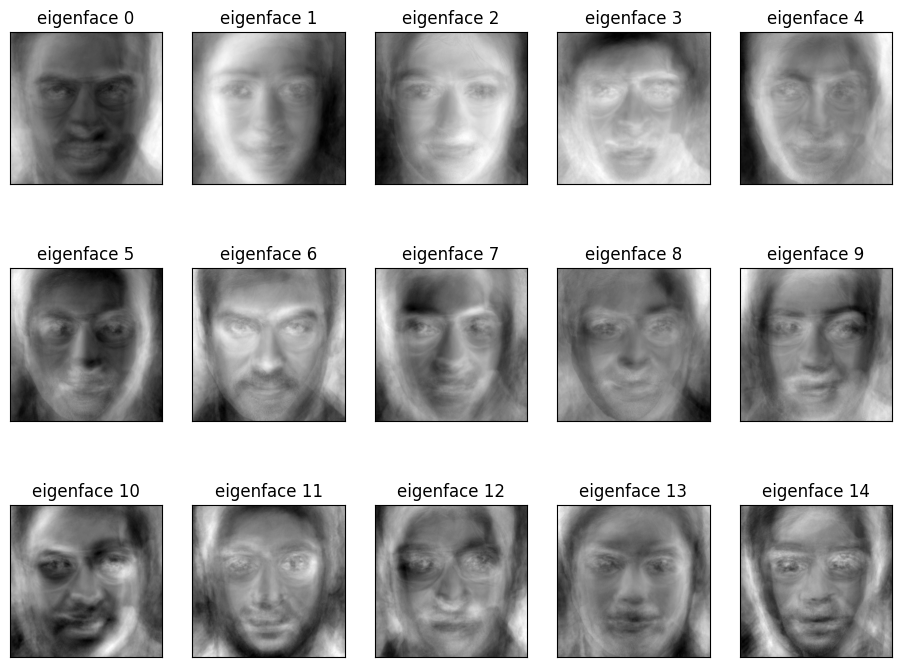

Projecting the input data on the eigenfaces orthonormal basis
PCA transformed shapes: (337, 150) (113, 150)
LDA transformed shapes: (337, 8) (113, 8)
Project done...


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Assuming X and y have been defined and preprocessed in the previous cell

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Number of components for PCA
n_components = 150
h = w = 300  # Assuming the image dimensions are 300x300

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

# Applying PCA (Principal Component Analysis)
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the gallery of the most significant eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")

# Projecting the data onto the PCA components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA transformed shapes:", X_train_pca.shape, X_test_pca.shape)

# Applying LDA (Linear Discriminant Analysis) on the PCA-reduced data
lda = LinearDiscriminantAnalysis()

# Fit the LDA model
lda.fit(X_train_pca, y_train)

# Transform the PCA-reduced data with LDA
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

print("LDA transformed shapes:", X_train_lda.shape, X_test_lda.shape)
print("Project done...")


In [ ]:
clf = MLPClassifier(random_state=42, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)

# Print the model weights information
print("Model weights:")

# Collecting the shape of each layer's coefficients
model_info = [coef.shape for coef in clf.coefs_]

print("Model info (shape of each layer's coefficients):", model_info)

Iteration 1, loss = 2.69042850
Iteration 2, loss = 2.65033544
Iteration 3, loss = 2.61166995
Iteration 4, loss = 2.57421576
Iteration 5, loss = 2.53846813
Iteration 6, loss = 2.50305619
Iteration 7, loss = 2.46943865
Iteration 8, loss = 2.43635313
Iteration 9, loss = 2.40446074
Iteration 10, loss = 2.37330388
Iteration 11, loss = 2.34378214
Iteration 12, loss = 2.31456584
Iteration 13, loss = 2.28596847
Iteration 14, loss = 2.25853008
Iteration 15, loss = 2.23213570
Iteration 16, loss = 2.20582931
Iteration 17, loss = 2.18010782
Iteration 18, loss = 2.15528755
Iteration 19, loss = 2.13083616
Iteration 20, loss = 2.10682573
Iteration 21, loss = 2.08288567
Iteration 22, loss = 2.05992651
Iteration 23, loss = 2.03673412
Iteration 24, loss = 2.01379372
Iteration 25, loss = 1.99170564
Iteration 26, loss = 1.96954441
Iteration 27, loss = 1.94750349
Iteration 28, loss = 1.92571175
Iteration 29, loss = 1.90416926
Iteration 30, loss = 1.88302308
Iteration 31, loss = 1.86226976
Iteration 32, los

Accuracy: 69.91%


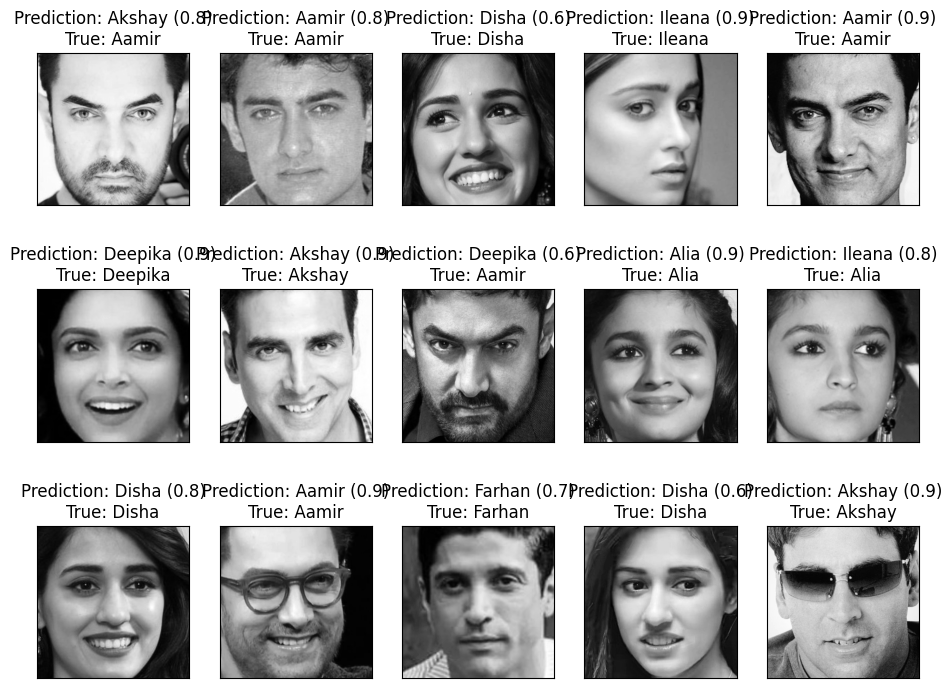

In [16]:
y_pred = []
y_prob = []

# Predict the probabilities and determine the predicted class for each test sample
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]  # Get the probability distribution for the test face

    # Determine the class with the highest probability
    class_id = np.argmax(prob)

    # Append the predictions and the probability of the predicted class
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Convert the predictions list to a numpy array
y_pred = np.array(y_pred)

# Titles for the predictions
prediction_titles = []

# Initialize the true positive count
true_positive = 0

# Compare the predicted labels with the true labels and create the result titles
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]  # Get the true class name
    pred_name = class_names[y_pred[i]]  # Get the predicted class name

    # Create the result string
    result = f'Prediction: {pred_name} ({str(y_prob[i])[:3]})\nTrue: {true_name}'
    prediction_titles.append(result)

    # Increment the true positive count if the prediction is correct
    if true_name == pred_name:
        true_positive += 1

# Calculate and print the accuracy
accuracy = true_positive * 100 / y_pred.shape[0]
print(f"Accuracy: {accuracy:.2f}%")

# Function to plot the gallery of test images with their prediction results
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Plot the results
plot_gallery(X_test, prediction_titles, h, w)

plt.show()
